# Advanced Calculus with SageMath - Chapter 3

## Optimization in Multiple Dimensions

This notebook contains Chapter 3 from the main Advanced Calculus with SageMath notebook.

For the complete course, please refer to the main notebook: `Advanced Calculus with SageMath.ipynb`


In [3]:
# Comprehensive imports for advanced calculus
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp, odeint
import sympy as sp
from sympy import *
from sage.all import *
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Advanced Calculus Environment Initialized")
print("Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib")
print("Ready for multivariable calculus, vector analysis, and PDEs!")

Advanced Calculus Environment Initialized
Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib
Ready for multivariable calculus, vector analysis, and PDEs!


## Chapter 3: Optimization in Multiple Dimensions

### Critical Points and Classification

For a function f(x,y), critical points occur where ∇f = 0. We classify them using the Hessian:
- **Local minimum**: H > 0 and fₓₓ > 0
- **Local maximum**: H > 0 and fₓₓ < 0  
- **Saddle point**: H < 0
- **Inconclusive**: H = 0

Where H = fₓₓfᵧᵧ - (fₓᵧ)² is the discriminant of the Hessian.

In [10]:
var('x y')

# Optimization: finding and classifying critical points
print("MULTIVARIABLE OPTIMIZATION")
print("=" * 50)

g = x**3 + y**3 - 3*x*y
print("Function: g(x,y) =", g)

gx = diff(g, x)
gy = diff(g, y)

print("\nFINDING CRITICAL POINTS")
print("∂g/∂x =", gx, "= 0")
print("∂g/∂y =", gy, "= 0")

# Return dicts so we can do cp[x], cp[y]
critical_points = solve([gx == 0, gy == 0], [x, y], solution_dict=True)

# Keep real solutions
real_critical_points = [cp for cp in critical_points
                        if bool(cp[x].is_real()) and bool(cp[y].is_real())]

print("\nReal critical points:", real_critical_points)

gxx = diff(g, x, 2)
gyy = diff(g, y, 2)
gxy = diff(g, x, y)

print("\nSECOND DERIVATIVE TEST")
print("gₓₓ =", gxx)
print("gᵧᵧ =", gyy)
print("gₓᵧ =", gxy)

H = gxx * gyy - gxy**2
print("\nHessian determinant H =", H)

for i, cp in enumerate(real_critical_points):
    H_val = float(H.subs(cp))
    gxx_val = float(gxx.subs(cp))
    print(f"\nCritical point {i+1}: {cp}")
    print(f"H = {H_val:.3f}, gₓₓ = {gxx_val:.3f}")
    if H_val > 0:
        print("Classification: LOCAL MINIMUM" if gxx_val > 0 else "Classification: LOCAL MAXIMUM")
    elif H_val < 0:
        print("Classification: SADDLE POINT")
    else:
        print("Classification: INCONCLUSIVE")
    g_val = float(g.subs(cp))
    print(f"Function value: g = {g_val:.3f}")

MULTIVARIABLE OPTIMIZATION
Function: g(x,y) = x^3 + y^3 - 3*x*y

FINDING CRITICAL POINTS
∂g/∂x = 3*x^2 - 3*y = 0
∂g/∂y = 3*y^2 - 3*x = 0

Real critical points: [{x: 1, y: 1}, {x: 0, y: 0}]

SECOND DERIVATIVE TEST
gₓₓ = 6*x
gᵧᵧ = 6*y
gₓᵧ = -3

Hessian determinant H = 36*x*y - 9

Critical point 1: {x: 1, y: 1}
H = 27.000, gₓₓ = 6.000
Classification: LOCAL MINIMUM
Function value: g = -1.000

Critical point 2: {x: 0, y: 0}
H = -9.000, gₓₓ = 0.000
Classification: SADDLE POINT
Function value: g = 0.000


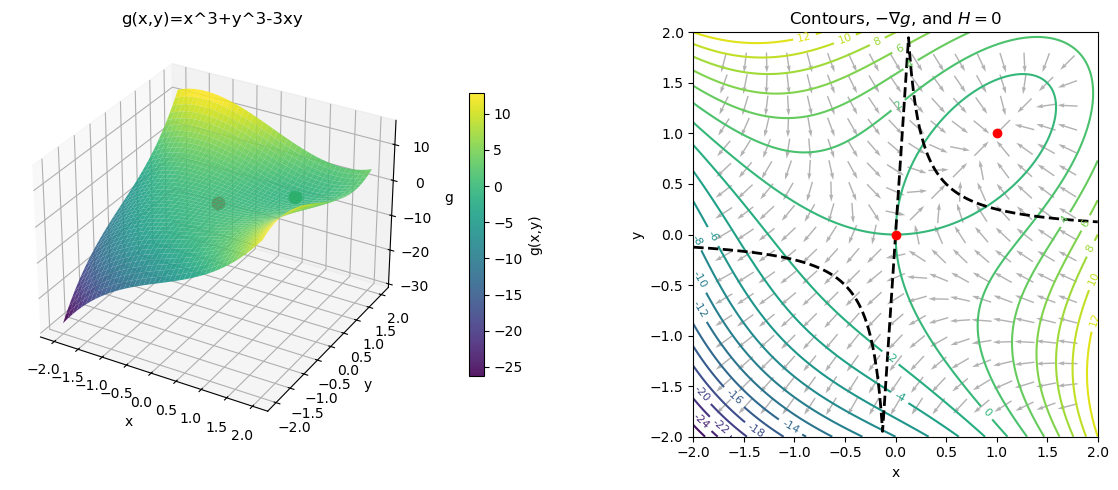

In [3]:
# Self-contained: compute critical points, then plot
var('x y')
g = x**3 + y**3 - 3*x*y
gx, gy = diff(g, x), diff(g, y)
critical_points = solve([gx == 0, gy == 0], [x, y], solution_dict=True)
real_critical_points = [cp for cp in critical_points
                        if bool(cp[x].is_real()) and bool(cp[y].is_real())]

import numpy as np
import matplotlib.pyplot as plt

def g_np(X, Y):
    return X**3 + Y**3 - 3*X*Y

xlim, ylim = (-2, 2), (-2, 2)
xv = np.linspace(*xlim, 201)
yv = np.linspace(*ylim, 201)
X, Y = np.meshgrid(xv, yv)
Z = g_np(X, Y)

fig = plt.figure(figsize=(12, 5))

ax3d = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax3d.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, linewidth=0, antialiased=True)
fig.colorbar(surf, ax=ax3d, shrink=0.7, pad=0.1, label='g(x,y)')
for cp in real_critical_points:
    cx, cy = float(cp[x]), float(cp[y])
    ax3d.scatter(cx, cy, g_np(cx, cy), s=80, c=('tab:green' if (cx, cy)==(1.0,1.0) else 'tab:red'))
ax3d.set_title('g(x,y)=x^3+y^3-3xy'); ax3d.set_xlabel('x'); ax3d.set_ylabel('y'); ax3d.set_zlabel('g')

ax2d = fig.add_subplot(1, 2, 2)
cs = ax2d.contour(X, Y, Z, levels=25, cmap='viridis'); ax2d.clabel(cs, inline=1, fontsize=8, fmt='%.0f')
xs = np.linspace(-1.7, 1.7, 17); ys = np.linspace(-1.7, 1.7, 17)
XX, YY = np.meshgrid(xs, ys)
Ux, Uy = 3*XX**2 - 3*YY, 3*YY**2 - 3*XX
L = np.hypot(Ux, Uy) + 1e-9
ax2d.quiver(XX, YY, -Ux/L, -Uy/L, color='gray', alpha=0.6, pivot='mid', scale=20)
x_curve = np.concatenate([np.linspace(-2, -0.05, 200), np.linspace(0.05, 2, 200)])
y_curve = 0.25 / x_curve
mask = (y_curve >= ylim[0]) & (y_curve <= ylim[1])
ax2d.plot(x_curve[mask], y_curve[mask], 'k--', lw=2, label='$H=36xy-9=0$')
ax2d.plot([0,1], [0,1], 'ro', ms=6)
ax2d.set_xlim(xlim); ax2d.set_ylim(ylim); ax2d.set_aspect('equal', 'box')
ax2d.set_title('Contours, $-\\nabla g$, and $H=0$'); ax2d.set_xlabel('x'); ax2d.set_ylabel('y')
plt.tight_layout(); plt.show()

---

## **Continuing Your Learning Journey**

You've completed **Optimization in Multiple Dimensions**! The concepts you've mastered here form essential building blocks for what comes next.

**Ready for Vector Fields and Line Integrals?**

In Chapter 4, we'll build upon these foundations to explore even more fascinating aspects of the subject. The knowledge you've gained here will directly apply to the advanced concepts ahead.

### **What's Next**

Chapter 4 will expand your understanding by introducing new techniques and applications that leverage everything you've learned so far.

**[Continue to Chapter 4: Vector Fields and Line Integrals →](https://cocalc.com/share/public_paths/976863519c0431a6535f7bbb94bd7cb8b155d444)**

*or*

**[Return to Complete Course](https://cocalc.com/share/public_paths/ab3ad2f15d8989653377cbfdc238a82399b2633f)**